#  NLP Word and Sentence Embedding Pipeline with Word2Vec & GloVe

This notebook demonstrates a basic natural language processing pipeline:

- Tokenizing and preprocessing text
- Training Word2Vec on a custom corpus
- Using pretrained GloVe vectors
- Averaging word vectors to get sentence vectors
- Visualizing with PCA
- (Later) Performing similarity search using cosine similarity

>  This is ideal for small-scale semantic search and educational use cases.


## Step 1: Import Required Libraries


In [1]:
!pip install scipy==1.9.3 --force-reinstall


  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.4 MB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you

## Step 2: Download NLTK Tokenizer Data

We download the 'punkt' tokenizer locally to avoid dependency on global system paths and ensure reproducibility across environments.


In [2]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install albumentations==2.0.8 and scipy==1.9.3 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested scipy==1.9.3
    albumentations 2.0.8 depends on scipy>=1.10.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [3]:
!pip install gensim==4.3.2

In [4]:
!pip install --upgrade --force-reinstall numpy


  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.3 requires numpy<1.26.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.9.3 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cud

In [5]:
!pip install numpy gensim scikit-learn

  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.25.2 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.9.3 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.
scikit-image 0.

In [6]:
!apt install genism =4.3.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package genism
E: Unable to locate package 


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import os

# Warning: This download will copy files to your home directory.
# For example, on Linux, it will copy files to ~/.nltk_data.
# In Windows, it will copy files to C:\Users\YourAccount\AppData\Roaming
# nltk.download('punkt')

# A better way to handle the download is to:
# Ensure 'punkt' is available and nltk_data path is set
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
print("Downloading 'punkt' tokenizer...")
nltk.download('punkt', download_dir=nltk_data_path, force=True)
print("Downloading 'punkt_tab' tokenizer...")
nltk.download('punkt_tab', download_dir=nltk_data_path, force=True)

# Always append the custom nltk_data path (if not already present)
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

# Debugging paths and contents
print("NLTK Data Paths:", nltk.data.path)
print("Contents of nltk_data:", os.listdir(nltk_data_path))

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK Data Paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/content/nltk_data']
Contents of nltk_data: ['tokenizers']


In [8]:
!pip install numpy

## Step 3: Define and Preprocess the Corpus

We define a small set of sentences (our corpus) and apply preprocessing:
- Lowercasing
- Removing punctuation
- Tokenizing using NLTK's `word_tokenize`


In [9]:
corpus = [
    "Artificial intelligence is transforming street design.",
    "Sidewalks and bike lanes are essential for inclusive mobility.",
    "Smart cities leverage data to improve pedestrian safety.",
    "Computer vision models detect street signs and traffic signals.",
    "Urban planning needs insights from machine learning."
]

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
tokenized_corpus


[['artificial', 'intelligence', 'is', 'transforming', 'street', 'design', '.'],
 ['sidewalks',
  'and',
  'bike',
  'lanes',
  'are',
  'essential',
  'for',
  'inclusive',
  'mobility',
  '.'],
 ['smart',
  'cities',
  'leverage',
  'data',
  'to',
  'improve',
  'pedestrian',
  'safety',
  '.'],
 ['computer',
  'vision',
  'models',
  'detect',
  'street',
  'signs',
  'and',
  'traffic',
  'signals',
  '.'],
 ['urban',
  'planning',
  'needs',
  'insights',
  'from',
  'machine',
  'learning',
  '.']]

Before training models like Word2Vec or GloVe, we clean and tokenize the raw text documents. This step includes:

Lowercasing text

Removing punctuation and non-alphabetic characters

Tokenizing sentences into words

Removing stopwords

In [10]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)
    return tokens

corpus = [preprocess(sentence) for sentence in corpus]
print(corpus[:2])

[['artificial', 'intelligence', 'is', 'transforming', 'street', 'design'], ['sidewalks', 'and', 'bike', 'lanes', 'are', 'essential', 'for', 'inclusive', 'mobility']]


## Step 4: Train Word2Vec Model on the Custom Corpus

We train a Word2Vec model using the skip-gram architecture (`sg=1`) to learn word embeddings from the preprocessed text.


In [11]:
# vector_size = 100 → each word becomes a 100D vector
# window = 5 → context window size
# sg = 1 → skip-gram (sg=0 for CBOW)

model_word2vec = Word2Vec(
    sentences=corpus,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1
)

## Step 5: Explore Word2Vec Embeddings

We retrieve the vector for a specific word (`intelligence`) and print similar words based on cosine similarity from the trained model.


In [12]:
word = "intelligence"
vector = model_word2vec.wv[word]
print(f"Vector for '{word}':\n", vector)

Vector for 'intelligence':
 [ 1.30016683e-03 -9.80430283e-03  4.58776252e-03 -5.38222783e-04
  6.33209571e-03  1.78347470e-03 -3.12979822e-03  7.75997294e-03
  1.55466562e-03  5.52093989e-05 -4.61295387e-03 -8.45352374e-03
 -7.76683213e-03  8.67050979e-03 -8.92496016e-03  9.03471559e-03
 -9.28101782e-03 -2.76756298e-04 -1.90704700e-03 -8.93114600e-03
  8.63005966e-03  6.77781366e-03  3.01943906e-03  4.83345287e-03
  1.12190246e-04  9.42468084e-03  7.02128746e-03 -9.85372625e-03
 -4.43322072e-03 -1.29011157e-03  3.04772262e-03 -4.32395237e-03
  1.44916656e-03 -7.84589909e-03  2.77807354e-03  4.70269192e-03
  4.93731257e-03 -3.17570218e-03 -8.42704065e-03 -9.22061782e-03
 -7.22899451e-04 -7.32746487e-03 -6.81496272e-03  6.12000562e-03
  7.17230327e-03  2.11741915e-03 -7.89940078e-03 -5.69898821e-03
  8.05184525e-03  3.92084382e-03 -5.24047017e-03 -7.39190448e-03
  7.71554711e-04  3.46375466e-03  2.07919348e-03  3.10080405e-03
 -5.62050007e-03 -9.88948625e-03 -7.02083716e-03  2.30308768e-

In [13]:
similar = model_word2vec.wv.most_similar(word)
print(f"Words similar to '{word}':\n", similar)

Words similar to 'intelligence':
 [('street', 0.21887058019638062), ('for', 0.1747603565454483), ('inclusive', 0.16378048062324524), ('signs', 0.14205607771873474), ('smart', 0.10855304449796677), ('to', 0.10733939707279205), ('safety', 0.0989944338798523), ('models', 0.09036577492952347), ('is', 0.06558066606521606), ('data', 0.05943490192294121)]


## Step 6: Load Pretrained GloVe Embeddings (50 Dimensions)

We use Gensim to load pretrained GloVe vectors trained on Wikipedia and Gigaword. These vectors provide semantically meaningful embeddings for known vocabulary words.


In [14]:
import gensim.downloader as api

# Load pretrained GloVe vectors (50-dimensional)
glove_vectors = api.load("glove-wiki-gigaword-50")  # You can change to 100, 200, 300

# Example usage
print(glove_vectors.most_similar("computer"))
print(glove_vectors.similarity("king", "queen"))

[==================================================] 100.0% 66.0/66.0MB downloaded
[('computers', 0.9165045022964478), ('software', 0.8814992904663086), ('technology', 0.852556049823761), ('electronic', 0.812586784362793), ('internet', 0.8060455322265625), ('computing', 0.802603542804718), ('devices', 0.8016185760498047), ('digital', 0.7991793751716614), ('applications', 0.7912740707397461), ('pc', 0.7883159518241882)]
0.7839043


## Step 7: Compute Sentence Embeddings by Averaging Word Vectors

We compute a sentence embedding by averaging the vectors of the individual words in the sentence. This is a simple and efficient method for sentence-level representation.


In [15]:
import numpy as np

def get_sentence_vector(sentence, model):
    words = sentence.lower().split()
    word_vectors = [model[word] for word in words if word in model]

    if not word_vectors:
        return np.zeros(model.vector_size)

    return np.mean(word_vectors, axis=0)

# Example sentences
sentences = [
    "The cat sat on the mat.",
    "Artificial intelligence is transforming the world.",
    "Dogs bark loudly at night."
]

# Vectorize all sentences
sentence_vectors = [get_sentence_vector(s, glove_vectors) for s in sentences]

# Print shape of vectors
print(len(sentence_vectors), sentence_vectors[0].shape)

3 (50,)


## Step 8: Visualize Sentence Embeddings Using PCA

We use Principal Component Analysis (PCA) to reduce the 50D sentence embeddings to 2D for visualization. This helps us explore semantic relationships between sentences.


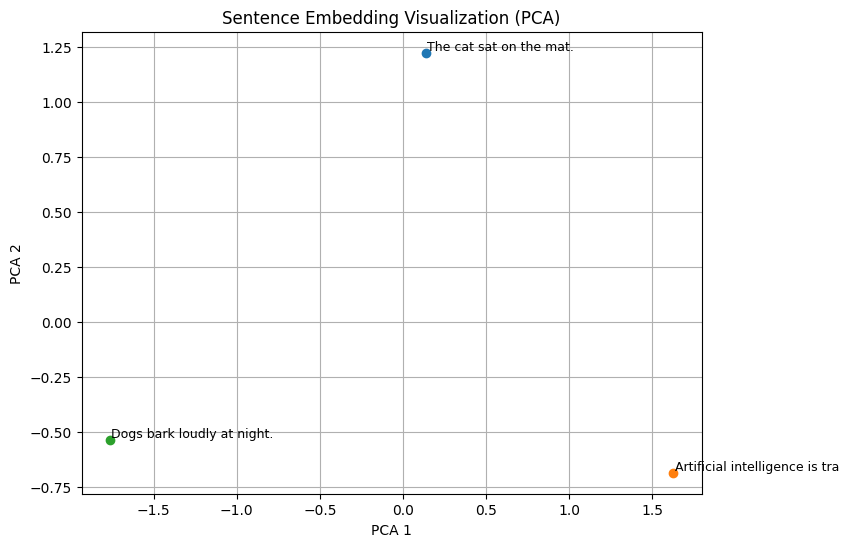

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, sentence[:30], fontsize=9)

plt.title("Sentence Embedding Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

## Step 9: Query-Based Semantic Similarity Search

In the next step, we will:
- Accept a user query
- Convert it to a sentence embedding
- Compare it with document sentence embeddings using cosine similarity
- Retrieve the most relevant sentence(s)

This forms the core of a simple **semantic search engine**.


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar(query, sentence_vectors, sentences, model):
    query_vector = get_sentence_vector(query, model).reshape(1, -1)
    similarities = cosine_similarity(query_vector, sentence_vectors)[0]

    top_idx = np.argmax(similarities)
    return sentences[top_idx], similarities[top_idx]


In [18]:
query = "How is AI changing city design?"
most_similar_sentence, score = find_most_similar(query, sentence_vectors, sentences, glove_vectors)

print("Query:", query)
print("Most Similar Sentence:", most_similar_sentence)
print("Similarity Score:", score)


Query: How is AI changing city design?
Most Similar Sentence: Artificial intelligence is transforming the world.
Similarity Score: 0.846231


| Feature                        | **Word2Vec**                                                      | **GloVe**                                                                 | **Talking Point**                                                                                                                                      |
| ------------------------------ | ----------------------------------------------------------------- | ------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Training Method**            | Predictive (uses context to predict a word via CBOW or skip-gram) | Count-based (factorizes a co-occurrence matrix)                           |  *Word2Vec learns representations from local context; GloVe captures global statistical information.*                                                |
| **Context Sensitivity**        | Learns based on local window around each word                     | Learns from entire co-occurrence matrix                                   |  *GloVe may be more effective for general knowledge corpora with structured knowledge; Word2Vec can adapt better to conversational context.*         |
| **Vector Meaning**             | Embedding reflects how a word is used in context                  | Embedding reflects how frequently two words appear together globally      |  *For similarity tasks like “How is AI changing city design?”, GloVe may relate “AI” and “city” better due to co-occurrence across document corpus.* |
| **Performance on Similarity**  | Generally strong for syntactic similarity                         | Generally strong for semantic similarity                                  |  *If the task demands understanding deep, abstract relationships, GloVe may outperform Word2Vec.*                                                    |
| **Out-of-Vocabulary Handling** | Poor (unless using fastText or similar extensions)                | Poor                                                                      |  *Consider integrating subword embeddings for unseen terms in real-time queries.*                                                                    |
| **Pretrained Availability**    | Widely available in many languages                                | Also widely available; GloVe.6B, GloVe.42B, GloVe.840B                    |  *Using pretrained GloVe vectors can accelerate similarity tasks without needing large training data.*                                               |
| **Interpretability**           | Embeddings are harder to interpret                                | Embedding differences are often interpretable |  *Use GloVe if interpretability of word vector arithmetic matters to your application (e.g., AI analogies in urban contexts).*                       |
